In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.preprocessing import image


Using TensorFlow backend.


In [3]:
%matplotlib inline

In [4]:
test = pd.read_csv('test.csv')

Загружаем нейросеть

In [5]:
# Список классов
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']

In [58]:
img_width, img_height = 225, 225

In [59]:
with open("plantPathology_cnn.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("plantPathology_cnn.h5")

Компилируем модель

In [60]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Загружаем изображение для распознавания

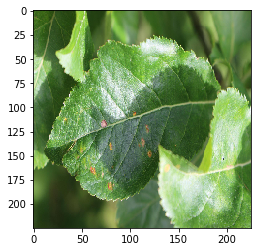

In [61]:
img = image.load_img('./predict/Test_1.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()

In [62]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255

Прогноз патологии по картинке

In [63]:
prediction = loaded_model.predict(x)

In [64]:
print(np.around(prediction,2))
print(classes[np.argmax(prediction)])

[[0.   0.01 0.99 0.  ]]
rust


In [65]:
probabilities = loaded_model.predict(x, verbose=1)
print(probabilities)

1/1 [==============================] - 0s 12ms/sample
[[9.2117517e-07 8.9028552e-03 9.9109614e-01 1.0230039e-07]]


In [66]:
h = np.around(probabilities[0][0], 2)
print(h)
m = np.around(probabilities[0][1], 2)
print(m)
r = np.around(probabilities[0][2], 2)
print(r)
s = np.around(probabilities[0][3], 2)
print(s)

0.0
0.01
0.99
0.0


Создаём predict для всех объектвов

In [67]:
answers = pd.DataFrame()
for i in range(0, 1821):
    img = image.load_img('./predict/Test_' + str(i) + '.jpg', target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    probabilities = loaded_model.predict(x)
    
    h = np.around(probabilities[0][0], 2)
    m = np.around(probabilities[0][1], 2)
    r = np.around(probabilities[0][2], 2)
    s = np.around(probabilities[0][3], 2)

    new_line = {'healthy':h, 'multiple_diseases':m,'rust':r, 'scab':s}
    answers = answers.append(new_line, ignore_index=True)    

In [68]:
answers

,healthy,multiple_diseases,rust,scab
0,0.00,0.00,1.00,0.00
1,0.00,0.01,0.99,0.00
2,0.06,0.01,0.00,0.94
3,0.99,0.00,0.00,0.01
4,0.00,0.00,1.00,0.00
...,...,...,...,...
1816,0.00,0.00,1.00,0.00
1817,0.00,0.00,0.00,1.00
1818,0.00,0.00,1.00,0.00
1819,1.00,0.00,0.00,0.00


In [69]:
test = pd.concat([test, round(answers, 2)], axis=1)

In [70]:
test.to_csv('submission.csv', sep=',', header=True, index=False)


!cat submission.csv
#!more submission.csv

image_id,healthy,multiple_diseases,rust,scab
Test_0,0.0,0.0,1.0,0.0
Test_1,0.0,0.01,0.99,0.0
Test_2,0.06,0.01,0.0,0.94
Test_3,0.99,0.0,0.0,0.01
Test_4,0.0,0.0,1.0,0.0
Test_5,0.02,0.02,0.0,0.95
Test_6,1.0,0.0,0.0,0.0
Test_7,0.03,0.04,0.0,0.93
Test_8,0.0,0.0,0.0,1.0
Test_9,0.0,0.0,1.0,0.0
Test_10,0.0,0.0,1.0,0.0
Test_11,0.92,0.03,0.01,0.04
Test_12,0.73,0.02,0.0,0.25
Test_13,1.0,0.0,0.0,0.0
Test_14,0.0,0.0,1.0,0.0
Test_15,0.0,0.0,1.0,0.0
Test_16,1.0,0.0,0.0,0.0
Test_17,0.0,0.0,0.0,1.0
Test_18,1.0,0.0,0.0,0.0
Test_19,0.0,0.0,1.0,0.0
Test_20,0.02,0.0,0.0,0.98
Test_21,1.0,0.0,0.0,0.0
Test_22,0.0,0.0,1.0,0.0
Test_23,0.0,0.0,0.0,1.0
Test_24,1.0,0.0,0.0,0.0
Test_25,0.0,0.0,0.0,1.0
Test_26,0.01,0.0,0.0,0.99
Test_27,0.0,0.0,1.0,0.0
Test_28,0.98,0.01,0.0,0.01
Test_29,0.0,0.03,0.97,0.0
Test_30,0.38,0.02,0.0,0.6
Test_31,0.0,0.58,0.42,0.0
Test_32,0.0,0.0,0.0,1.0
Test_33,0.0,0.0,0.0,1.0
Test_34,0.0,0.0,0.0,0.99
Test_35,0.0,0.0,0.0,0.99
Test_36,0.0,0.0,1.0,0.0
Test_37,0.95,0.01,0.0,0.04
Test_38,0.0,0.0

In [71]:
#files.download("submission.csv")

In [21]:
img = decode_image('./predict/Test_1.jpg')

Tensor("ReadFile_2:0", shape=(), dtype=string)
Tensor("DecodeJpeg_2:0", shape=(?, ?, 3), dtype=uint8)
Tensor("truediv_2:0", shape=(?, ?, 3), dtype=float32)
Tensor("resize_2/Squeeze:0", shape=(512, 512, 3), dtype=float32)
